## EDA from DB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cx_Oracle

In [2]:
def get_data_from_db(query):
    conn = cx_Oracle.connect('hoseo', 'hoseo', 'localhost:1521/xe')
    df = pd.read_sql(query, conn)
    conn.close()
    return df

### 지역별 전체 매매건수

In [3]:
query = """
    SELECT region as 지역, count(*) as 거래건수
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region ASC
    """

In [4]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   거래건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,거래건수
0,강원도,142353
1,경기도,1334713
2,경상남도,300502
3,경상북도,196949
4,광주광역시,183148


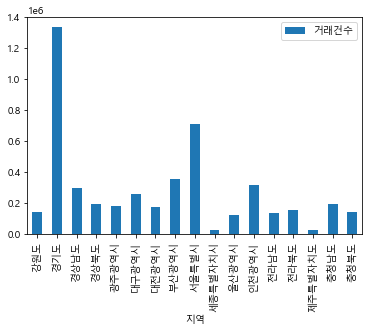

In [5]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='거래건수', rot=90)
plt.show()

### 지역별 초소형 소형 중소형 중대형 대형별 매매건수

In [6]:
query = """
    SELECT region as 지역, count(*) as 초소형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size < 60
    GROUP BY region
    ORDER BY region
    """

In [7]:
df1 = get_data_from_db(query)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   초소형건수   17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,초소형건수
0,강원도,78603
1,경기도,504061
2,경상남도,134626
3,경상북도,94499
4,광주광역시,79499


In [8]:
query = """
    SELECT region as 지역, count(*) as 소형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size > 60 AND apt_size <= 85
    GROUP BY region
    ORDER BY region
    """

In [9]:
df2 = get_data_from_db(query)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   소형건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,소형건수
0,강원도,50540
1,경기도,584984
2,경상남도,136589
3,경상북도,81968
4,광주광역시,79700


In [10]:
query = """
    SELECT region as 지역, count(*) as 중소형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size > 85 AND apt_size <= 100
    GROUP BY region
    ORDER BY region
    """

In [11]:
df3 = get_data_from_db(query)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   중소형건수   17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,중소형건수
0,강원도,1674
1,경기도,24901
2,경상남도,3333
3,경상북도,1589
4,광주광역시,3030


In [12]:
query = """
    SELECT region as 지역, count(*) as 중대형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size > 100 AND apt_size <= 135
    GROUP BY region
    ORDER BY region
    """

In [13]:
df4 = get_data_from_db(query)
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   중대형건수   17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,중대형건수
0,강원도,8086
1,경기도,169442
2,경상남도,20000
3,경상북도,13202
4,광주광역시,13589


In [14]:
query = """
    SELECT region as 지역, count(*) as 대형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size > 135
    GROUP BY region
    ORDER BY region
    """

In [15]:
df5 = get_data_from_db(query)
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   대형건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,대형건수
0,강원도,2181
1,경기도,40432
2,경상남도,4754
3,경상북도,3457
4,광주광역시,4643


In [16]:
dataD = df1.merge(df2, on='지역').merge(df3, on='지역').merge(df4, on='지역').merge(df5, on='지역')
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   초소형건수   17 non-null     int64 
 2   소형건수    17 non-null     int64 
 3   중소형건수   17 non-null     int64 
 4   중대형건수   17 non-null     int64 
 5   대형건수    17 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 952.0+ bytes


,지역,초소형건수,소형건수,중소형건수,중대형건수,대형건수
0,강원도,78603,50540,1674,8086,2181
1,경기도,504061,584984,24901,169442,40432
2,경상남도,134626,136589,3333,20000,4754
3,경상북도,94499,81968,1589,13202,3457
4,광주광역시,79499,79700,3030,13589,4643


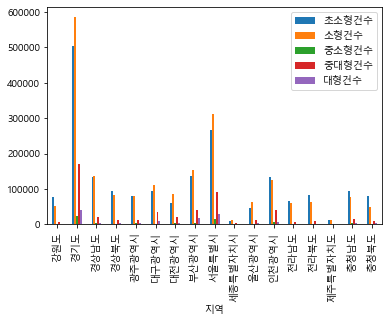

In [17]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', rot=90)
plt.show()

### 지역별 평균 거래금액

In [18]:
query = """
    SELECT region as 지역, AVG(contract_price) as 평균거래금액
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region
    """

In [19]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   평균거래금액  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,평균거래금액
0,강원도,1.283586e+08
1,경기도,3.083282e+08
2,경상남도,1.811539e+08
3,경상북도,1.388568e+08
4,광주광역시,1.891000e+08


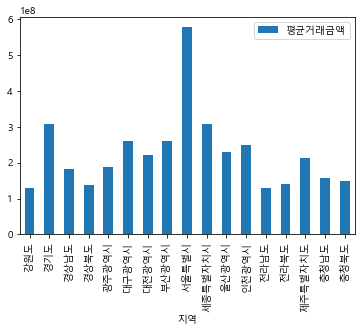

In [20]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='평균거래금액', rot=90)
plt.show()

### 지역별 평균 면적

In [21]:
query = """
    SELECT region as 지역, AVG(apt_size) as 평균면적m2
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region
    """

In [22]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   평균면적M2  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,평균면적M2
0,강원도,67.972494
1,경기도,78.337085
2,경상남도,72.747086
3,경상북도,71.402030
4,광주광역시,74.724864


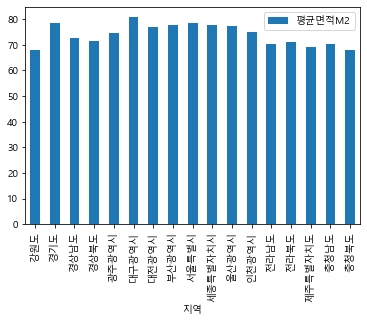

In [23]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='평균면적M2', rot=90)
plt.show()

### 지역별 동일평수 가격 비교

In [47]:
query = """
    SELECT region as 지역, COUNT(DISTINCT apt_size) as 평형
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region
    """

In [48]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   평형      17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,평형
0,강원도,1712
1,경기도,7534
2,경상남도,3883
3,경상북도,3026
4,광주광역시,1581


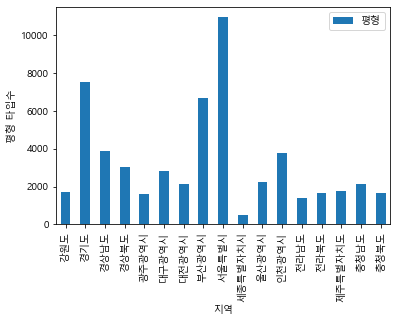

In [49]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='평형', rot=90)
ax.set(ylabel='평형 타입수')
plt.show()

In [50]:
query = """
    SELECT region as 지역, AVG(contract_price) as 초소형
    FROM APT_DEAL_PRICE
    WHERE apt_size < 60
    GROUP BY region
    ORDER BY region
    """

In [51]:
df1 = get_data_from_db(query)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   초소형     17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,초소형
0,강원도,8.398403e+07
1,경기도,2.125880e+08
2,경상남도,1.254252e+08
3,경상북도,8.395296e+07
4,광주광역시,1.179138e+08


In [52]:
query = """
    SELECT region as 지역, AVG(contract_price) as 소형
    FROM APT_DEAL_PRICE
    WHERE apt_size > 60 AND apt_size <= 85
    GROUP BY region
    ORDER BY region
    """

In [53]:
df2 = get_data_from_db(query)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   소형      17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,소형
0,강원도,1.710137e+08
1,경기도,3.227713e+08
2,경상남도,2.075882e+08
3,경상북도,1.728581e+08
4,광주광역시,2.206021e+08


In [54]:
query = """
    SELECT region as 지역, AVG(contract_price) as 중소형
    FROM APT_DEAL_PRICE
    WHERE apt_size > 85 AND apt_size <= 100
    GROUP BY region
    ORDER BY region
    """

In [55]:
df3 = get_data_from_db(query)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   중소형     17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,중소형
0,강원도,2.045782e+08
1,경기도,4.161081e+08
2,경상남도,2.387319e+08
3,경상북도,2.111983e+08
4,광주광역시,2.090039e+08


In [56]:
query = """
    SELECT region as 지역, AVG(contract_price) as 중대형
    FROM APT_DEAL_PRICE
    WHERE apt_size > 100 AND apt_size <= 135
    GROUP BY region
    ORDER BY region
    """

In [57]:
df4 = get_data_from_db(query)
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   중대형     17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,중대형
0,강원도,2.377430e+08
1,경기도,4.665156e+08
2,경상남도,3.169834e+08
3,경상북도,2.702423e+08
4,광주광역시,3.433663e+08


In [58]:
query = """
    SELECT region as 지역, AVG(contract_price) as 대형
    FROM APT_DEAL_PRICE
    WHERE apt_size > 135
    GROUP BY region
    ORDER BY region
    """

In [59]:
df5 = get_data_from_db(query)
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   대형      17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,대형
0,강원도,2.883940e+08
1,경기도,5.797336e+08
2,경상남도,3.894924e+08
3,경상북도,3.224259e+08
4,광주광역시,4.404592e+08


In [60]:
dataD = df1.merge(df2, on='지역').merge(df3, on='지역').merge(df4, on='지역').merge(df5, on='지역')
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   초소형     17 non-null     float64
 2   소형      17 non-null     float64
 3   중소형     17 non-null     float64
 4   중대형     17 non-null     float64
 5   대형      17 non-null     float64
dtypes: float64(5), object(1)
memory usage: 952.0+ bytes


,지역,초소형,소형,중소형,중대형,대형
0,강원도,8.398403e+07,1.710137e+08,2.045782e+08,2.377430e+08,2.883940e+08
1,경기도,2.125880e+08,3.227713e+08,4.161081e+08,4.665156e+08,5.797336e+08
2,경상남도,1.254252e+08,2.075882e+08,2.387319e+08,3.169834e+08,3.894924e+08
3,경상북도,8.395296e+07,1.728581e+08,2.111983e+08,2.702423e+08,3.224259e+08
4,광주광역시,1.179138e+08,2.206021e+08,2.090039e+08,3.433663e+08,4.404592e+08


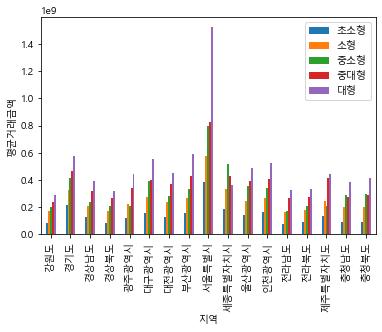

In [61]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', rot=90)
ax.set(ylabel='평균거래금액')
plt.show()

### 지역별 동일평수 가격 변동

In [39]:
query = """
    SELECT region as 지역, AVG(contract_price) as 소형2012
    FROM APT_DEAL_PRICE
    WHERE apt_size < 60 AND contract_date BETWEEN '2012/08/24' AND '2013/01/01'
    GROUP BY region
    ORDER BY region
    """

In [40]:
df1 = get_data_from_db(query)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   소형2012  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,소형2012
0,강원도,7.022702e+07
1,경기도,1.621816e+08
2,경상남도,1.109088e+08
3,경상북도,7.112188e+07
4,광주광역시,9.571677e+07
